In [1024]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import plot_model
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
from skimage import io, color
from PIL import Image
import warnings
import cv2

In [1025]:
#Pre_Process_For Direct SEM Images


In [1088]:
or_input = 'ref/ref22_d.png'
or_output = 'tmp/input.png'
size = (400,400)
rgb = io.imread(or_input)
resized_image = resize(rgb, size)
rescaled_image = 255 * resized_image
final_image = rescaled_image.astype(np.uint8)
io.imsave(or_output,final_image)


/home/habeshageeks/.virtualenvs/ml/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/habeshageeks/.virtualenvs/ml/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [1089]:
dir_style = 'sem/' 
style_input = 'AI-22.jpg'
style_output = 'tmp/style.png'
size = (400,400)
rgb = io.imread(dir_style+style_input)
resized_image = resize(rgb, size)
rescaled_image = 255 * resized_image
final_image = rescaled_image.astype(np.uint8)
io.imsave(style_output,final_image)

/home/habeshageeks/.virtualenvs/ml/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/habeshageeks/.virtualenvs/ml/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


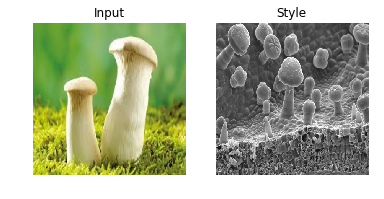

In [1090]:
fig = plt.figure()

a=fig.add_subplot(1,2,1)
img_rslt=mpimg.imread(or_output)
imgplot= plt.imshow(img_rslt)
a.set_title('Input')
a.axis('off')
a=fig.add_subplot(1,2,2)
img_gray=mpimg.imread(style_output)
imgplot= plt.imshow(img_gray)
a.set_title('Style')

a.axis('off')
plt.show()

In [1091]:
# Get images

input_image = img_to_array(load_img(or_output))
input_image = np.array(input_image, dtype=float)
style_image = img_to_array(load_img(style_output))
style_image = np.array(style_image, dtype=float)


In [1092]:
X = rgb2lab(1.0/255*input_image)[:,:,0]
Y = rgb2lab(1.0/255*input_image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)
## TO be Draw
X_style = rgb2lab(1.0/255*style_image)[:,:,0]
#X_style = style_image.reshape((image.shape[0] * image.shape[1], 3))
X_style = X_style.reshape(1, 400, 400, 1)



In [1093]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [1094]:
# Finish model
model.compile(optimizer='rmsprop',loss='mse')
#plot_model(model, to_file='model.png')

In [1095]:
history = model.fit(x=X, 
    y=Y,
    batch_size=1,
    epochs=500)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.8424
Epoch 2/500
1/1 [==============================] - 0s 15ms/step - loss: 0.5316
Epoch 3/500
1/1 [==============================] - 0s 14ms/step - loss: 0.6046
Epoch 4/500
1/1 [==============================] - 0s 17ms/step - loss: 0.6044
Epoch 5/500
1/1 [==============================] - 0s 15ms/step - loss: 0.6041
Epoch 6/500
1/1 [==============================] - 0s 16ms/step - loss: 0.6038
Epoch 7/500
1/1 [==============================] - 0s 16ms/step - loss: 0.6034
Epoch 8/500
1/1 [==============================] - 0s 16ms/step - loss: 0.6028
Epoch 9/500
1/1 [==============================] - 0s 16ms/step - loss: 0.6018
Epoch 10/500
1/1 [==============================] - 0s 16ms/step - loss: 0.6012
Epoch 11/500
1/1 [==============================] - 0s 15ms/step - loss: 0.5979
Epoch 12/500
1/1 [==============================] - 0s 15ms/step - loss: 0.4507
Epoch 13/500
1/1 [==============================] -

Epoch 104/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0214
Epoch 105/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0158
Epoch 106/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0179
Epoch 107/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0171
Epoch 108/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0220
Epoch 109/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0153
Epoch 110/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0162
Epoch 111/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0165
Epoch 112/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0213
Epoch 113/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0161
Epoch 114/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0192
Epoch 115/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0165
Epoch 116/500
1/1 [=========

1/1 [==============================] - 0s 13ms/step - loss: 0.0144
Epoch 206/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0125
Epoch 207/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0136
Epoch 208/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0132
Epoch 209/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0162
Epoch 210/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0124
Epoch 211/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0127
Epoch 212/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0137
Epoch 213/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0194
Epoch 214/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0145
Epoch 215/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0147
Epoch 216/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0181
Epoch 217/500
1/1 [=======================

Epoch 307/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0093
Epoch 308/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0086
Epoch 309/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0091
Epoch 310/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0079
Epoch 311/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0082
Epoch 312/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0074
Epoch 313/500
1/1 [==============================] - 0s 14ms/step - loss: 0.0078
Epoch 314/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0106
Epoch 315/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0123
Epoch 316/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0143
Epoch 317/500
1/1 [==============================] - 0s 14ms/step - loss: 0.0139
Epoch 318/500
1/1 [==============================] - 0s 14ms/step - loss: 0.0148
Epoch 319/500
1/1 [=========

1/1 [==============================] - 0s 13ms/step - loss: 0.0060
Epoch 409/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0056
Epoch 410/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0053
Epoch 411/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0054
Epoch 412/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0048
Epoch 413/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0055
Epoch 414/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0057
Epoch 415/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0079
Epoch 416/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0043
Epoch 417/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0056
Epoch 418/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0084
Epoch 419/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0112
Epoch 420/500
1/1 [=======================

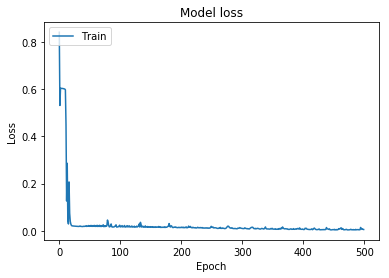

In [1096]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [1097]:
color_dict = {}
color_dict_max = {}
color_dict_max_ab = {}
def same_grey_same_colorize(AB, L):
    
    for i in range(L.shape[0]):
        for j in range(L.shape[1]):
            l = L[i][j]
            ab = list(map(lambda x:int(x), AB[i][j] + 128))
            if l not in color_dict:
                color_dict[l] = [[0]*256]*256
                color_dict_max[l] = 0
            color_dict[l][ab[0]][ab[1]] += 1
            if color_dict[l][ab[0]][ab[1]] > color_dict_max[l]:
                color_dict_max[l] = color_dict[l][ab[0]][ab[1]]
                color_dict_max_ab[l] = AB[i][j]
                
    for i in range(L.shape[0]):
        for j in range(L.shape[1]):
            l = L[i][j]
            AB[i][j] = color_dict_max_ab[l]
    return AB

In [1098]:
#debug code
#l = np.array([[1,3,4,1],[3,4,1,3]])
#ab = np.array([[5,7,8,5],[8,9,6,7]])
#same_grey_same_colorize(ab, l)

In [1099]:
print(model.evaluate(X_style, Y, batch_size=1))

output = model.predict(X_style)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
L = X_style[0][:,:,0]
AB = output[0]
cur[:,:,0] = L
cur[:,:,1:] = same_grey_same_colorize(AB, L)
imsave("or_result/"+style_input, lab2rgb(cur))
imsave("or_result/img_gray_version.png", rgb2gray(lab2rgb(cur)))


1/1 [==============================] - 1s 958ms/step
0.01671026088297367


/home/habeshageeks/.virtualenvs/ml/lib/python3.5/site-packages/skimage/color/colorconv.py:993: UserWarning: Color data out of range: Z < 0 in 44 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
/home/habeshageeks/.virtualenvs/ml/lib/python3.5/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/habeshageeks/.virtualenvs/ml/lib/python3.5/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


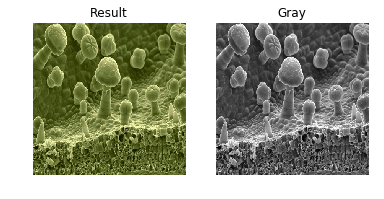

In [1100]:
fig = plt.figure()

a=fig.add_subplot(1,2,1)
img_rslt=mpimg.imread('or_result/'+style_input)
imgplot= plt.imshow(img_rslt)
a.set_title('Result')
a.axis('off')
a=fig.add_subplot(1,2,2)
img_gray=mpimg.imread('or_result/img_gray_version.png')
imgplot= plt.imshow(img_gray,cmap='gray')
a.set_title('Gray')

a.axis('off')
plt.show()

In [1101]:
#After Process
filename = 'or_result/'+style_input
image = cv2.imread(filename)
frame = cv2.imread(filename)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, imgf = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#imgf = cv2.adaptiveThreshold(gray_image,11,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,255,125)
mask = imgf
res = cv2.bitwise_and(frame, frame, mask=mask)
cv2.imwrite('cv/'+style_input,res)


True

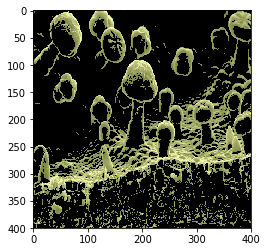

In [1102]:
imgplt = plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))
plt.show()